In [128]:
from transformers import pipeline
from nltk import sent_tokenize
import nltk
import torch
from glob import glob
import pandas as pd
import numpy as np

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\menah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# load model

In [16]:
model_name="facebook/bart-large-mnli"
device=0 if torch.cuda.is_available() else 'cpu'

In [17]:
def load_model(device):
    theme_classifier=pipeline(
        'zero-shot-classification',
        model=model_name,
        device=device
    )
    return theme_classifier

In [18]:
theme_classifier=load_model(device)

config.json: 0.00B [00:00, ?B/s]

c:\Users\menah\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\menah\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

c:\Users\menah\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
theme_list = ["friendship","hope","sacrifice","battle","self development","betrayal","love","dialogue"]

In [21]:
theme_classifier(
    'i gave him a right hook then a left jab',
    theme_list,
    multi_label=True
)

{'sequence': 'i gave him a right hook then a left jab',
 'labels': ['battle',
  'self development',
  'hope',
  'sacrifice',
  'dialogue',
  'betrayal',
  'love',
  'friendship'],
 'scores': [0.9196869730949402,
  0.5670506358146667,
  0.10998109728097916,
  0.07718375325202942,
  0.01976591907441616,
  0.01282662246376276,
  0.005526348482817411,
  0.0029952244367450476]}

# load dataset

In [109]:
files = glob("DATA\\Subtitles\\*.ass")

In [110]:
files[:5]

['DATA\\Subtitles\\Naruto Season 1 - 01.ass',
 'DATA\\Subtitles\\Naruto Season 1 - 02.ass',
 'DATA\\Subtitles\\Naruto Season 1 - 03.ass',
 'DATA\\Subtitles\\Naruto Season 1 - 04.ass',
 'DATA\\Subtitles\\Naruto Season 1 - 05.ass']

In [111]:
with open(files[0], 'r') as file:
    lines=file.readlines()
    lines= lines[27:]
    lines = [",".join(line.split(',')[9:]) for line in lines]

    

In [112]:
lines=[line.replace('\\N',' ') for line in lines]

In [113]:
' '.join(lines[:10])

"A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can't let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known as… the Fourth Hokage.\n Naruto!\n"

In [114]:
lines[:2]

['A long time ago, a powerful demon fox appeared with nine tails.\n',
 'With its powerful tails,\n']

In [115]:
int(files[0].split('-')[-1].split('.')[0].strip())

1

In [116]:
def load_subtitles_dataset(dataset_path):
    subtitles_paths=glob(dataset_path+"\\*.ass")


    scripts=[]
    episode_num=[]

    for path in subtitles_paths:
        with open(path, 'r') as file:
            lines=file.readlines()
            lines= lines[27:]
            lines = [",".join(line.split(',')[9:]) for line in lines]

        lines=[line.replace('\\N',' ') for line in lines]
        script=' '.join(lines)

        episode=int(path.split('-')[-1].split('.')[0].strip())
        
        scripts.append(script)
        episode_num.append(episode)

    df=pd.DataFrame.from_dict({"episode":episode_num ,"script":scripts})
    return df  


In [136]:
dataset_path="DATA\\Subtitles"
df=load_subtitles_dataset(dataset_path)

In [118]:
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."


# run model

In [119]:
script=df.iloc[0]['script']

In [120]:
script_sent= sent_tokenize(script)
script_sent

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,\n it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.',
 'We have to wait until the Fourth Hokage gets here!',
 "We can't let it get any closer to our village!",
 'One great Ninja was able to imprison the monster,\n but died in the process.',
 'This Ninja was known as… the Fourth Hokage.',
 'Naruto!',
 'Why did you do such a thing?!',
 "You're really gonna get it this time!",
 "I don't care!",
 'You know your problem?',
 "You can't do the things I do!",
 'Only I can do this!',
 "I'm better than all of you!",
 'Believe it!',
 "There's a problem, sir!",
 'Lord Hokage!',
 'What is it?',
 'Did that Naruto do something again?',
 'Yes.',
 'He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!',
 'Wait!',
 'Ha ha…\n Why should I?',
 'Hey, Naruto!',
 'How did you suddenly get here, lruka Sensei?',
 'The q

In [121]:
sent_batch_size=20
script_batches=[]

for i in range(0 , len(script_sent) , sent_batch_size):
    sent=' '.join(script_sent[i:i+sent_batch_size])
    script_batches.append(sent)
    

In [123]:
theme_output=theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label=True
)

In [126]:
themes={}
for output in theme_output:
    for label ,score in zip(output['labels'],output['scores']):
        if label not in themes:
            themes[label]=[]
        themes[label].append(score)

In [129]:
themes ={ key: np.mean(np.array(value))  for key , value in themes.items()}

In [131]:
def get_themes_inference(script):
    script_sent= sent_tokenize(script)

    sent_batch_size=20
    script_batches=[]

    for i in range(0 , len(script_sent) , sent_batch_size):
        sent=' '.join(script_sent[i:i+sent_batch_size])
        script_batches.append(sent)


    theme_output=theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label=True
    )
    

    themes={}
    for output in theme_output:
        for label ,score in zip(output['labels'],output['scores']):
            if label not in themes:
                themes[label]=[]
            themes[label].append(score)


    themes ={ key: np.mean(np.array(value))  for key , value in themes.items()}

    return themes


In [138]:
dff=df.head(2)

In [139]:
output=dff['script'].apply(get_themes_inference)

In [142]:
theme_df=pd.DataFrame(output.tolist())

In [144]:
dff[theme_df.columns]=theme_df

C:\Users\menah\AppData\Local\Temp\ipykernel_20060\3263655287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[theme_df.columns]=theme_df
C:\Users\menah\AppData\Local\Temp\ipykernel_20060\3263655287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[theme_df.columns]=theme_df
C:\Users\menah\AppData\Local\Temp\ipykernel_20060\3263655287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [145]:
dff

,episode,script,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared...",0.958543,0.792708,0.756410,0.680433,0.798159,0.201669,0.072629,0.034141
1,2,"C'mon!\n Running like a fugitive,\n Being chas...",0.960606,0.429944,0.684846,0.570703,0.482811,0.154534,0.046261,0.173261


# visualize output

In [149]:
dff=dff.drop('dialogue', axis=1)

In [154]:
dff=dff.drop(['episode' , 'script'], axis=1).sum().reset_index()

In [156]:
dff.columns=['theme','score']

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

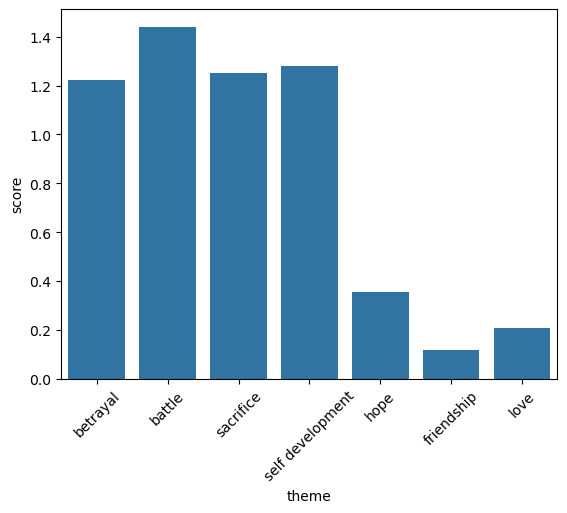

In [160]:
sns.barplot(data=dff ,x='theme' , y='score')
plt.xticks(rotation=45)
plt.show()